<a href="https://colab.research.google.com/github/kamzon/Gallery_Images_classifier/blob/main/Gallery_Images_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
import os
os.environ['KAGGLE_USERNAME']="kamzon"
os.environ['KAGGLE_KEY']="4e8880ecf65acf484dfd34df7d74b4a5"
!kaggle datasets download -d n0obcoder/mobile-gallery-image-classification-data

 99% 857M/866M [00:13<00:00, 63.7MB/s]
100% 866M/866M [00:13<00:00, 66.2MB/s]


In [ ]:
!ls

mobile-gallery-image-classification-data.zip  sample_data


In [ ]:
!unzip mobile-gallery-image-classification-data.zip

Archive:  mobile-gallery-image-classification-data.zip
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/dwight.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/house.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/mahabodhi_tree.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/maruti800.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/michael.jpeg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/modi_selfie.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/sachin_selfie.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/train/Cars/cars_000.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/trai

In [ ]:
!ls mobile_gallery_image_classification/mobile_gallery_image_classification/train

Cars  Memes  Mountains	Selfies  Trees	Whatsapp_Screenshots


In [ ]:
!ls mobile_gallery_image_classification/mobile_gallery_image_classification/train/Whatsapp_Screenshots

whatsapp_screenshots_000.jpg  whatsapp_screenshots_082.jpg
whatsapp_screenshots_001.jpg  whatsapp_screenshots_083.jpg
whatsapp_screenshots_002.jpg  whatsapp_screenshots_084.jpg
whatsapp_screenshots_003.jpg  whatsapp_screenshots_085.jpg
whatsapp_screenshots_004.jpg  whatsapp_screenshots_086.jpg
whatsapp_screenshots_005.jpg  whatsapp_screenshots_087.jpg
whatsapp_screenshots_006.jpg  whatsapp_screenshots_088.jpg
whatsapp_screenshots_007.jpg  whatsapp_screenshots_089.jpg
whatsapp_screenshots_008.jpg  whatsapp_screenshots_090.jpg
whatsapp_screenshots_009.jpg  whatsapp_screenshots_091.jpg
whatsapp_screenshots_010.jpg  whatsapp_screenshots_092.jpg
whatsapp_screenshots_011.jpg  whatsapp_screenshots_093.jpg
whatsapp_screenshots_012.jpg  whatsapp_screenshots_094.jpg
whatsapp_screenshots_013.jpg  whatsapp_screenshots_095.jpg
whatsapp_screenshots_014.jpg  whatsapp_screenshots_096.jpg
whatsapp_screenshots_015.jpg  whatsapp_screenshots_097.jpg
whatsapp_screenshots_016.jpg  whatsapp_screenshots_098.j

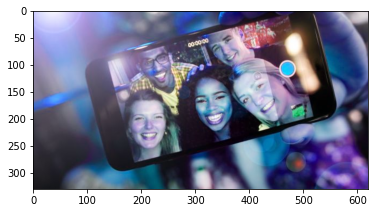

In [ ]:
from matplotlib import pyplot as plt 
import cv2
care= cv2.imread("mobile_gallery_image_classification/mobile_gallery_image_classification/train/Cars/cars_000.jpg")
meme= cv2.imread("mobile_gallery_image_classification/mobile_gallery_image_classification/train/Memes/memes_000.jpg")
mountain= cv2.imread("mobile_gallery_image_classification/mobile_gallery_image_classification/train/Mountains/mountains_000.jpg")
selfie= cv2.imread("mobile_gallery_image_classification/mobile_gallery_image_classification/train/Selfies/selfies_011.jpg")
tree= cv2.imread("mobile_gallery_image_classification/mobile_gallery_image_classification/train/Trees/trees_000.jpg")
screen= cv2.imread("mobile_gallery_image_classification/mobile_gallery_image_classification/train/Whatsapp_Screenshots/whatsapp_screenshots_000.jpg")
tab=[care,meme,mountain,selfie,tree,screen]
plt.imshow(selfie)

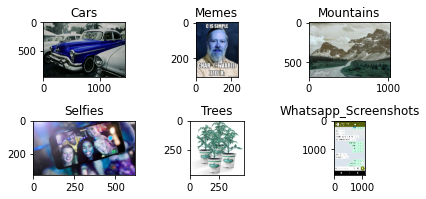

In [ ]:
from matplotlib import pyplot as plt  
Classes=["Cars" , "Memes",  "Mountains",	"Selfies",  "Trees","Whatsapp_Screenshots"]
for i in range(len(tab)):
  plt.subplot(3,3,i+1)
  plt.imshow(tab[i])
  plt.title(Classes[i])
  plt.tight_layout()

In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv 
import os
from numpy import * 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split

from PIL import Image
import scipy.io as sio
#from skimage.transfrorm import rescale
from skimage import color
from skimage.exposure import *

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

def readImage(im_path):
  img =io.imread(im_path)
  img= color.rgb2gray(img)
  img=rescale_intensity(img, out_range=(0,255))
  return img

In [ ]:
import PIL
from PIL import Image
#from resizeimage import resizeimage


def loadData():
  x_tr=[]
  y_tr=[]
  x_val=[]
  y_val=[]

  classes=["Cars/" , "Memes/",  "Mountains/",	"Selfies/",  "Trees/","Whatsapp_Screenshots/"]
  for i in range(0,6):
    #print(i)
    classe=zeros(6)
    classe[i]=1

    pathClasse="mobile_gallery_image_classification/mobile_gallery_image_classification/train/"+classes[i]


    x=[]
    y=[]


    for f in os.listdir(pathClasse):
      if f[len(f)-3 : len(f)]=="jpg":
        #print(f)
        img=readImage(pathClasse+"/"+f)
        #print(img.shape)
        img=cv.resize(img,(256,256))
        #img.save(pathClasse+"/"+f)
        #print(img.shape)
        #input()
        #plt.imshow(img)
        #print(classe)
        #input()
        x.append(img)
        y.append(classe)
      #print(".")

    print(np.asarray(x).shape)
    print(np.asarray(y).shape)
    
    xtr,ytr,xte,yte=train_test_split(x,y,test_size=0.25, random_state=42)

    x_tr.extend(xtr)
    y_tr.extend(ytr)
    x_val.extend(xte)
    y_val.extend(yte)
  
  return asarray(x_tr),asarray(y_tr),asarray(x_val),asarray(y_val),

In [ ]:
x_tr,x_val,y_tr,y_val=loadData()

(163, 256, 256)
(163, 6)
(175, 256, 256)
(175, 6)


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(240, 256, 256)
(240, 6)
(237, 256, 256)
(237, 6)
(287, 256, 256)
(287, 6)
(164, 256, 256)
(164, 6)


In [ ]:
print(x_tr.shape)
print(y_tr.shape)
print(x_val.shape)
print(y_val.shape)

(948, 256, 256)
(948, 6)
(318, 256, 256)
(318, 6)


[1. 0. 0. 0. 0. 0.]


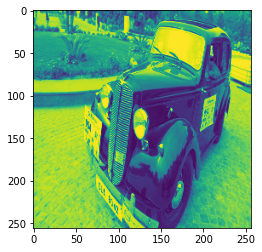

In [ ]:
plt.imshow(x_tr[0])
print(y_tr[0])

In [ ]:
import PIL
from PIL import Image
#from resizeimage import resizeimage


def loadDatate():
  x_tr=[]
  y_tr=[]
  x_te=[]
  y_te=[]

  classes=["Cars/" , "Memes/",  "Mountains/",	"Selfies/",  "Trees/","Whatsapp_Screenshots/"]
  for i in range(1):
    #print(i)
    classe=zeros(6)
    classe[i]=1

    pathClasse="mobile_gallery_image_classification/mobile_gallery_image_classification/test/"


    x=[]
    y=[]


    for f in os.listdir(pathClasse):
      if f[len(f)-3 : len(f)]=="jpg":
        #print(f)
        img=readImage(pathClasse+"/"+f)
        #print(img.shape)
        img=cv.resize(img,(256,256))
        #img.save(pathClasse+"/"+f)
        #print(img.shape)
        #input()
        #plt.imshow(img)
        #print(classe)
        #input()
        x.append(img)
        y.append(classe)
      #print(".")

    print(np.asarray(x).shape)
    print(np.asarray(y).shape)
    
    xtr,ytr,xte,yte=train_test_split(x,y,test_size=0.5, random_state=42)

    #x_tr.extend(x)
    #y_tr.extend(y)
    x_te.extend(x)
    y_te.extend(y)
  
  return asarray(x_te),asarray(y_te)

In [ ]:
x_te,y_te=loadDatate()

(6, 256, 256)
(6, 6)


In [ ]:
x_te.shape

(6, 150, 150)

In [ ]:
x_tr[0].shape

(150, 150)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_path="mobile_gallery_image_classification/mobile_gallery_image_classification/train/"

train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.3, zoom_range=0.3,
                                   channel_shift_range=0.0,
                                   fill_mode='nearest', cval=0.0, horizontal_flip=True, vertical_flip=False, rescale=1/255.,
                                   data_format='channels_last', validation_split=0.3,
                                   dtype='float32')

train_generator = train_datagen.flow_from_directory(train_path, target_size=(256,256), color_mode="rgb", 
                                                    class_mode="categorical", batch_size=64, subset="training")

Using TensorFlow backend.


Found 888 images belonging to 6 classes.


In [ ]:
train_datagen

In [ ]:
# ajouter la dimension du profondeur
x_tr=x_tr.reshape(x_tr.shape[0],256,256,1)
x_val=x_val.reshape(x_val.shape[0],256,256,1)
x_te=x_te.reshape(x_te.shape[0],256,256,1)

In [ ]:
#normalisation des valeurs 
x_tr=x_tr.astype('float32')
x_valr=x_val.astype('float32')
#x_te=x_te.astype('float32')
x_tr /= 255
x_val /= 255
#x_te /=255

In [ ]:
x_te=x_te.astype('float32')
x_te /=255

In [ ]:
# 4- definir l'architecture du model

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Convolution2D as Conv2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import GlobalAveragePooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(256,256,1), activation='elu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(rate=0.20))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(rate=0.20))


model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='elu'))
model.add(Dropout(rate=0.20))

model.add(Dense(128, activation='elu'))
model.add(Dropout(rate=0.20))
model.add(Dense(6, activation='softmax'))



In [ ]:
# 5- compiler le model
from keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.000001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)       

In [ ]:
# 6- adapter le modele

history=model.fit(x_tr,y_tr,validation_data = (x_val , y_val), batch_size=32,nb_epoch=10,verbose=1)


Train on 948 samples, validate on 318 samples
Epoch 1/500
 32/948 [>.............................] - ETA: 2s - loss: 1.0312 - accuracy: 0.6562

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


948/948 [==============================] - 3s 3ms/step - loss: 0.9820 - accuracy: 0.6424 - val_loss: 0.9482 - val_accuracy: 0.6824
Epoch 2/500
948/948 [==============================] - 3s 3ms/step - loss: 0.9884 - accuracy: 0.6329 - val_loss: 0.9431 - val_accuracy: 0.6824
Epoch 3/500
948/948 [==============================] - 3s 3ms/step - loss: 0.9731 - accuracy: 0.6646 - val_loss: 0.9375 - val_accuracy: 0.6824
Epoch 4/500
948/948 [==============================] - 3s 3ms/step - loss: 0.9738 - accuracy: 0.6540 - val_loss: 0.9331 - val_accuracy: 0.6824
Epoch 5/500
948/948 [==============================] - 3s 3ms/step - loss: 0.9674 - accuracy: 0.6456 - val_loss: 0.9283 - val_accuracy: 0.6918
Epoch 6/500
948/948 [==============================] - 3s 3ms/step - loss: 0.9479 - accuracy: 0.6540 - val_loss: 0.9226 - val_accuracy: 0.6950
Epoch 7/500
948/948 [==============================] - 3s 3ms/step - loss: 0.9537 - accuracy: 0.6466 - val_loss: 0.9172 - val_accuracy: 0.6918
Epoch 8/500

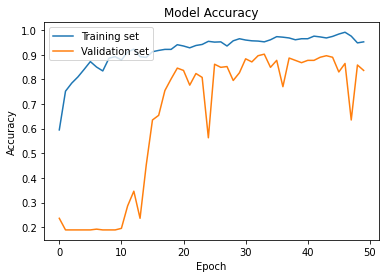

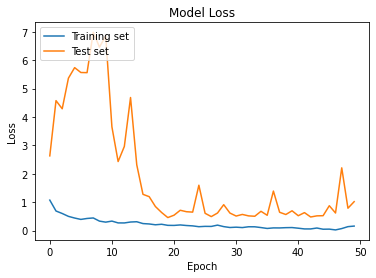

In [ ]:
#final model result:
# Accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

# Loss 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [ ]:
x_te.shape

(6, 150, 150, 1)

In [ ]:
pred=model.predict(x_te)

In [ ]:
pred=np.argmax(np.round(pred),axis=1)
pred.shape

(6,)

array([1., 0., 0., 0., 0., 0.])

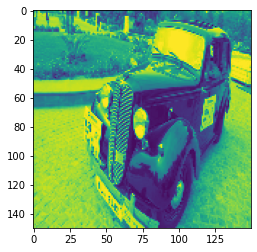

In [ ]:
plt.imshow(x_tr[0].reshape(150,150))
y_tr[0]

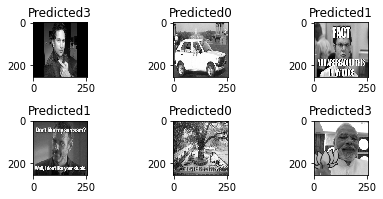

In [ ]:
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.imshow(x_te[i].reshape(256,256),cmap='gray',interpolation='none')
  plt.title("Predicted{}".format(pred[i]))
  plt.tight_layout()

In [ ]:
pred.shape

(6, 6)

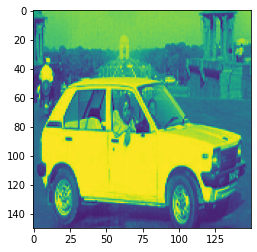

In [ ]:
plt.imshow(x_te[3].reshape(150,150))

In [ ]:
pred[3]

array([4.8652177e-14, 6.8237519e-08, 8.9675449e-09, 1.9402853e-05,
       9.9998057e-01, 5.8430641e-21], dtype=float32)

In [ ]:
m=p[1][0]
for i in range(len(pred[3])):
  if(p[1][i]<m):
    m=p[1][i]

print(m)


1.9244313e-19


In [ ]:
img=readImage("mobile_gallery_image_classification/mobile_gallery_image_classification/train/Cars/cars_000.jpg")
img=cv.resize(img,(150,150))
l=[]
for i in range(10):
  l.extend([x_tr[i+300]])
p=model.predict(asarray(l))

In [ ]:
p[1]

array([2.6552204e-16, 2.1381005e-12, 1.0000000e+00, 3.8252574e-14,
       1.2971205e-08, 1.9244313e-19], dtype=float32)

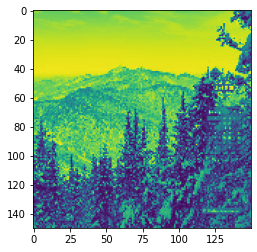

In [ ]:
plt.imshow(l[1].reshape(150,150))